### CNN building blocks 

Understanding wiki page: https://en.wikipedia.org/wiki/Convolutional_neural_network

Convolution
- Useful for CNNs, solving differential equations, multiplying polynomial coeffs, prob, etc

Equation: interpret as g having its input reversed and marching along the t (time) dimension
![image](https://user-images.githubusercontent.com/56745453/216858768-e60aefad-fc00-4ec7-827e-f7529e5f52cf.png)

Discrete version:
![image](https://user-images.githubusercontent.com/56745453/216858618-0bda89b3-4d53-4b34-a669-3b243a4f414e.png)


<!-- ![convolution](https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif) -->

In [2]:
# convs of lists, ex. probabilities on pairs of dice

def conv_list(a, b):
  # output list will be of length len(a) + len(b) - 1
  ans_len = len(a) + len(b)
  ans = []
  
  for n in range(2,ans_len+1):
    # get all (i,j) pairs that sum to n
    sum = 0
    for i in range(1,n):
      j = n - i
      if i <= len(a) and j <= len(b):
        sum += a[i-1] * b[j-1] # multiply and sum
    ans.append(sum)
  
  return ans

In [5]:
a = [1,2,3]
b = [4,5,6]

import numpy as np

print(np.convolve(a, b))
print(conv_list(a,b))

print(conv_list([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10])) # woot woot
print(np.convolve([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10]))

[ 4 13 28 27 18]
[4, 13, 28, 27, 18]
[1, 4, 10, 20, 35, 56, 84, 120, 165, 220, 264, 296, 315, 320, 310, 284, 241, 180, 100]
[  1   4  10  20  35  56  84 120 165 220 264 296 315 320 310 284 241 180
 100]


In [12]:
# example: averaging

dist = [0.1]*5 + [1.0]*5 + [0.1]*5 + [1.0]*5 + [0.1]*5
coeff = [0.2]*5 

avg_dist = conv_list(dist, coeff)

<BarContainer object of 29 artists>

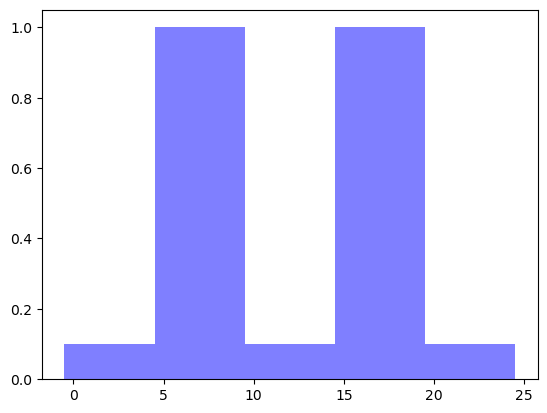

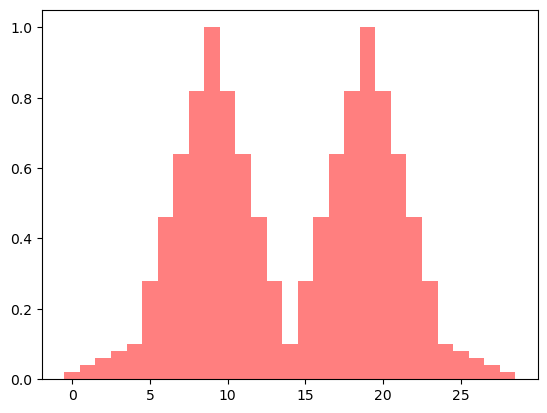

In [17]:
import matplotlib.pyplot as plt

# plot each element of dist as a rectangular bin
plt.bar(range(len(dist)), dist, width=1, color='b', alpha=0.5)
# separate plot with avg_dist
plt.figure()
plt.bar(range(len(avg_dist)), avg_dist, width=1, color='r', alpha=0.5) # beautiful!

In [23]:
# another example: polynomial coefficients
# (also see ../fourier/fourier.ipynb for example of FFT and convolving polynomials)

# 2x^2 + 3x + 4
p1 = [2,3,4]
p2 = [1,2,3] # 1x^2 + 2x + 3

conv_list(p1, p2) # [2, 7, 16, 15, 12]

[2, 7, 16, 17, 12]

FFT can be used to improve convolutions by using "circular convolution theorem" - think of the complex unit circle and how some of the values are repeated, which can be used to compute the convolution faster instead of using O(N^2) computations (using the FFT, it's O(NlogN)

Also useful for solving differential equations; convolution theorem for solving Laplace transforms L(f*g) = FG where * is convolution and F is L(f) and G is L(g)